In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
summer_events = pd.read_csv('../Project-1/summer.csv')
winter_events = pd.read_csv('../Project-1/winter.csv')
dictionary_data = pd.read_csv('dictionary.csv', usecols=['Code', 'Country','GDP per Capita'])

country_mapping = dict(zip(dictionary_data['Code'], dictionary_data['Country']))

known_country_names =  {
    'URS': 'USSR-Prior 1992',
    'TCH': 'Czechoslovakia- Prior 1992',
    'ROU': 'Romania',
    'GDR': 'East Germany-Prior 1992',
    'EUN': 'Europe Unified Team',
    'FRG': 'Germany- Prior 1990',
    'EUA': 'Austria- pre AUT',
    'ZZX': 'Unknown',
    'ANZ': 'Australia-New Zealand',
    'BOH': 'Bohemia',
    'RU1': 'Russia',
    'YUG': 'Yugoslavia',
}

summer_events['Country Name'] = summer_events['Country'].map(country_mapping)


In [3]:
for index, row in summer_events.iterrows():
    country_code = row['Country']
    if pd.isna(row['Country Name']):
        if country_code in country_mapping:
            summer_events.at[index, 'Country Name'] = country_mapping[country_code]
        elif country_code in known_country_names:
            summer_events.at[index, 'Country Name'] = known_country_names[country_code]

In [4]:
dictionary_data

,Country,Code,GDP per Capita
0,Afghanistan,AFG,594.323081
1,Albania,ALB,3945.217582
2,Algeria,ALG,4206.031232
3,American Samoa*,ASA,NaN
4,Andorra,AND,NaN
...,...,...,...
196,Vietnam,VIE,2111.138024
197,Virgin Islands*,ISV,NaN
198,Yemen,YEM,1406.291651
199,Zambia,ZAM,1304.879014


In [5]:
country_gdp_df = dictionary_data.drop(columns=['Code'])
country_gdp_df = pd.DataFrame(country_gdp_df)

track_field = summer_events.loc[(summer_events['Sport'] == 'Athletics') & (summer_events['Year'] >= 1948)]
track_field_df = pd.DataFrame(track_field)

track_field_df = track_field_df.drop(['Year','Country','Discipline','City','Sport'],axis=1)
track_field_df = track_field_df = track_field_df.reindex(columns=['Country Name','Athlete','Gender','Event','Medal'])
track_field_df = track_field_df.drop(track_field_df[track_field_df['Event'] == '4X100M Relay'].index)
track_field_df = track_field_df.drop(track_field_df[track_field_df['Event'] == '4X400M Relay'].index)


In [6]:
track_field_df.to_csv('../Project-1/track_field.csv',index=False)
track_field_df = pd.read_csv('../Project-1/track_field.csv')


In [11]:
country_medals = track_field_df.drop(['Athlete','Gender','Event','Gender'],axis=1)

country_gold_count = country_medals.loc[(country_medals['Medal'] == 'Gold')]
country_silver_count = country_medals.loc[(country_medals['Medal'] == 'Silver')]
country_bronze_count = country_medals.loc[(country_medals['Medal'] == 'Bronze')]

gold_medal = country_gold_count.value_counts().reset_index(level=1,drop=True)
silver_medal = country_silver_count.value_counts().reset_index(level=1,drop=True)
bronze_medal = country_bronze_count.value_counts().reset_index(level=1,drop=True)

country_medals_df = pd.DataFrame({'Gold': gold_medal,'Silver': silver_medal,'Bronze': bronze_medal}).fillna(0)
country_medals_df = country_medals_df.nlargest(10,['Gold','Silver','Bronze'])
country_medals_df['Total'] = country_medals_df['Gold'] + country_medals_df['Silver'] + country_medals_df['Bronze']


country_medals_df




,Gold,Silver,Bronze,Total
Country Name,,,,
United States,145.0,125.0,105.0,375.0
USSR-Prior 1992,59.0,50.0,69.0,178.0
East Germany-Prior 1992,34.0,31.0,34.0,99.0
United Kingdom,26.0,41.0,30.0,97.0
Kenya,23.0,30.0,25.0,78.0
Russia,22.0,20.0,24.0,66.0
Ethiopia,21.0,8.0,16.0,45.0
Poland,20.0,12.0,10.0,42.0
Australia,17.0,21.0,21.0,59.0


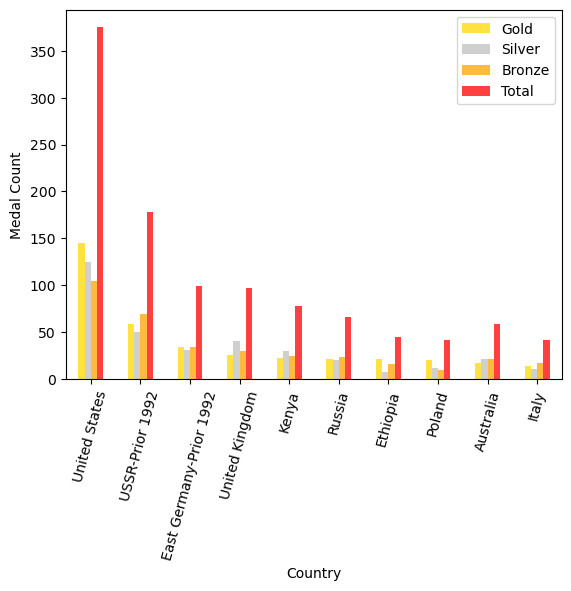

In [14]:
medal_plot = country_medals_df.plot(kind='bar',ylabel='Medal Count',xlabel='Country',
                                    color=['Gold','Silver','Orange','Red'], alpha=.75,rot=75)

plt.savefig('../Project-1/top_10_medal.png', bbox_inches ='tight')



